In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aggregation of Statements and Processing

In [3]:
accs = [f for f in os.listdir('./') if os.path.isdir(os.path.join('./', f))]

for acc in accs:
    if acc == "TD Credit":
        stmts = [stmt for stmt in os.listdir(os.path.join('./', acc))]
        agg_stmt = pd.read_csv(''.join(('./', acc, '/', stmts[0])), error_bad_lines=False)
        if len(stmts) > 1:
            for stmt in stmts[1:]:
                temp = pd.read_csv(''.join(('./', acc, '/', stmt)), error_bad_lines=False)
                temp.columns = agg_stmt.columns
                agg_stmt = agg_stmt.append(temp, ignore_index=True)
        agg_stmt.to_csv(''.join(('./', acc, '.csv')), index=False)
    else:
        stmts = [stmt for stmt in os.listdir(os.path.join('./', acc))]
        agg_stmt = pd.read_csv(''.join(('./', acc, '/', stmts[0])), error_bad_lines=False)
        if len(stmts) > 1:
            for stmt in stmts[1:]:
                temp = pd.read_csv(''.join(('./', acc, '/', stmt)), error_bad_lines=False)
                agg_stmt = pd.concat([agg_stmt, temp])
        agg_stmt.to_csv(''.join(('./', acc, '.csv')), index=False)



c:\Users\Victor\anaconda3\envs\MAIS\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Process credit cards
ct = pd.read_csv('./Canadian Tire.csv')
ct["Account"] = "Canadian Tire Mastercard"
ct["AmountIn"] = np.where(ct["AMOUNT"] >= 0, ct["AMOUNT"], 0)
ct["AmountOut"] = np.where(ct["AMOUNT"] < 0, ct["AMOUNT"]*-1, 0)
ct = ct.rename(columns={"TRANSACTION DATE": "Date", "DESCRIPTION": "Description"})
ct["Date"] = pd.to_datetime(ct['Date'])
ct = ct[["Account", "Date", "Description", "AmountIn", "AmountOut"]]

pc = pd.read_csv('./PC Financial.csv')
pc["Account"] = "PC Financial Mastercard"
pc["AmountIn"] = np.where(pc["Amount"] >= 0, pc["Amount"], 0)
pc["AmountOut"] = np.where(pc["Amount"] < 0, pc["Amount"]*-1, 0)
pc = pc[["Account", "Date", "Description", "AmountIn", "AmountOut"]]

sfv = pd.read_csv('./Simplii Credit.csv')
sfv["Account"] = "Simplii Financial Visa"
sfv = sfv.rename(columns={" Transaction Details": "Description", " Funds Out": "AmountOut", " Funds In": "AmountIn"})
sfv = sfv[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tdv = pd.read_csv('./TD Credit.csv')
tdv["Account"] = "TD Visa"
tdv = tdv.rename(columns={"Debit": "AmountOut", "Credit": "AmountIn"})
tdv = tdv[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tgm = pd.read_csv('./Tangerine Credit.csv')
tgm["Account"] = "Tangerine Mastercard"
tgm["AmountIn"] = np.where(tgm["Amount"] >= 0, tgm["Amount"], 0)
tgm["AmountOut"] = np.where(tgm["Amount"] < 0, tgm["Amount"]*-1, 0)
tgm = tgm.rename(columns={"Transaction date": "Date", "Name": "Description"})
tgm = tgm[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

# Process chequing accounts
tgc = pd.read_csv('./Tangerine Chequing.csv')
tgc["Account"] = "Tangerine Chequing"
tgc["AmountIn"] = np.where(tgc["Amount"] >= 0, tgc["Amount"], 0)
tgc["AmountOut"] = np.where(tgc["Amount"] < 0, tgc["Amount"]*-1, 0)
tgc = tgc.rename(columns={"Name": "Description"})
tgc = tgc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tdc = pd.read_csv('./TD Chequing.csv')
tdc["Account"] = "TD Chequing"
tdc = tdc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)


sfc = pd.read_csv('./Simplii Chequing.csv')
sfc["Account"] = "Simplii Chequing"
sfc = sfc.rename(columns={" Transaction Details": "Description", " Funds Out": "AmountOut", " Funds In ": "AmountIn"})
sfc = sfc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

In [5]:
agg_acc = ct
agg_acc = pd.concat([agg_acc, pc, sfv, tdv, tgm, tgc, tdc, sfc])
agg_acc["Date"] = pd.to_datetime(agg_acc['Date'])


## Binning 
Previously categorized into Investments, Productivity, Material Desires, Health and Vanity, Necessities, Education, Food, Recreation, and Donations


In [ ]:
agg_acc["Category"] = np.nan

# Manual Binning
def bin(findata):
    #findata.loc[findata['Description'] == 'COCO TEA          _F', 'Category'] = 'Food'
    #findata.loc[findata['Description'] == 'SAVINGS ACC', 'Category'] = 'Investments'
    #findata.at[15, 'Category'] = 'Productivity'
    #findata.at[47, 'Category'] = 'Productivity'
    #findata.at[74, 'Category'] = 'Productivity'
    pass


bin(agg_acc)
#This is called each time to help visualize what else is left to be binned.
empty = agg_acc.loc[agg_acc['Category'].isna()]
empty

## Monthy Income and Outcome Analysis

         AmountIn  AmountOut
Date                        
2022-01   4911.02     568.71
2022-02   1674.38     631.11
2022-03   3406.45    1139.38
2022-04   2575.48    3845.43
2022-05   6891.49    1511.50
         AmountIn  AmountOut
Date                        
2022-01   4911.02     568.71
2022-02   1674.38     631.11
2022-03   3406.45    1139.38
2022-04   2575.48    3845.43
2022-05   6891.49    1511.50
2022-06   3874.51    3570.21
2022-07   3014.42    3120.66
2022-08   5010.34   17696.54
2022-09  19502.17    3924.78
2022-10   4356.04    4107.33
2022-11   2833.29    3125.05
2022-12  11893.84    8872.94
2023-01  60531.00   53139.18
2023-02   7746.56    6330.65
2023-03   6337.78    6365.66
2023-04  16788.42   11761.00
2023-05  18159.63   57040.22
2023-06   9623.29    7054.47


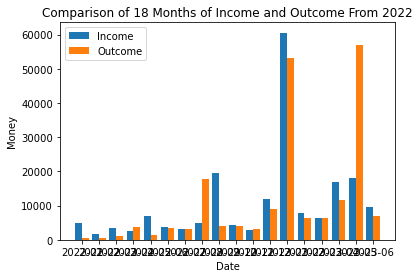

In [16]:
ia = agg_acc.copy(True)

ia['Date'] = ia['Date'].dt.strftime('%Y-%m')
ia = ia[['Date', "AmountIn", "AmountOut"]].groupby('Date').agg('sum')

X = ia.index
income = ia['AmountIn'].to_numpy()
outcome = ia['AmountOut'].to_numpy()
  
X_axis = np.arange(len(X))
print(ia)
plt.bar(X_axis - 0.2, income, 0.4, label = 'Income')
plt.bar(X_axis + 0.2, outcome, 0.4, label = 'Outcome')
  
plt.xticks(X_axis, X)
plt.xlabel("Date")
plt.ylabel("Money")
plt.title("Comparison of 18 Months of Income and Outcome From 2022")
plt.legend()
plt.show()